# Dataset

In [ ]:
import kagglehub

path = kagglehub.dataset_download("ertugrulesol/online-retail-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'online-retail-data' dataset.
Path to dataset files: /kaggle/input/online-retail-data


In [ ]:
import pandas as pd
import os

file_path = os.path.join(path, "synthetic_online_retail_data.csv")
df = pd.read_csv(file_path, encoding="ISO-8859-1")

print(df.head())

   customer_id  order_date  product_id  category_id       category_name  \
0        13542  2024-12-17         784           10         Electronics   
1        23188  2024-06-01         682           50   Sports & Outdoors   
2        55098  2025-02-04         684           50   Sports & Outdoors   
3        65208  2024-10-28         204           40  Books & Stationery   
4        63872  2024-05-10         202           20             Fashion   

  product_name  quantity   price payment_method            city  review_score  \
0   Smartphone         2  373.36    Credit Card  New Oliviaberg           1.0   
1  Soccer Ball         5  299.34    Credit Card    Port Matthew           NaN   
2         Tent         5   23.00    Credit Card      West Sarah           5.0   
3   Story Book         2  230.11  Bank Transfer  Hernandezburgh           5.0   
4        Skirt         4  176.72    Credit Card    Jenkinshaven           1.0   

  gender  age  
0      F   56  
1      M   59  
2      F   64 

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [ ]:
dfdescribe = df.describe()
print(dfdescribe)

        customer_id   product_id  category_id     quantity        price  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   55490.723000   540.726000    30.030000     2.947000   251.850660   
std    25910.185857   261.737704    14.370303     1.413573   139.194688   
min    10201.000000   100.000000    10.000000     1.000000    10.720000   
25%    33857.000000   311.750000    20.000000     2.000000   128.525000   
50%    54619.500000   542.500000    30.000000     3.000000   250.220000   
75%    77848.500000   770.750000    40.000000     4.000000   366.467500   
max    99923.000000   995.000000    50.000000     5.000000   499.500000   

       review_score          age  
count    799.000000  1000.000000  
mean       3.992491    46.382000  
std        1.239469    16.569992  
min        1.000000    18.000000  
25%        3.000000    32.000000  
50%        4.000000    47.000000  
75%        5.000000    61.000000  
max        5.000000    75.000000  


# Data Cleaning

In [ ]:
df.isnull().sum()

,0
customer_id,0
order_date,0
product_id,0
category_id,0
category_name,0
product_name,0
quantity,0
price,0
payment_method,0
city,0


In [ ]:
duplicated_sum = df.duplicated().sum()
print("Jumlah data duplikat:", duplicated_sum)

Jumlah data duplikat: 0


In [ ]:
df.columns.tolist()

['customer_id',
 'order_date',
 'product_id',
 'category_id',
 'category_name',
 'product_name',
 'quantity',
 'price',
 'payment_method',
 'city',
 'review_score',
 'gender',
 'age']

In [ ]:
# Menangani data yang hilang
dropna = df.dropna()
print(dropna)

     customer_id  order_date  product_id  category_id       category_name  \
0          13542  2024-12-17         784           10         Electronics   
2          55098  2025-02-04         684           50   Sports & Outdoors   
3          65208  2024-10-28         204           40  Books & Stationery   
4          63872  2024-05-10         202           20             Fashion   
5          29989  2024-12-03         829           10         Electronics   
..           ...         ...         ...          ...                 ...   
992        11479  2025-01-28         331           20             Fashion   
993        94141  2024-09-01         701           20             Fashion   
996        99828  2024-09-12         510           40  Books & Stationery   
998        61427  2024-09-17         410           10         Electronics   
999        20658  2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method               city  \


In [ ]:
# Isi missing value kolom numerik (review_score) dengan median
df['review_score'].fillna(df['review_score'].median())

,review_score
0,1.0
1,4.0
2,5.0
3,5.0
4,1.0
...,...
995,4.0
996,3.0
997,4.0
998,3.0


In [ ]:
# Isi missing value kolom kategori (gender) dengan 'Unknown'
df['gender'].fillna('Unknown')

,gender
0,F
1,M
2,F
3,M
4,F
...,...
995,Unknown
996,F
997,M
998,M


In [ ]:
# Ubah kolom tanggal jadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Pastikan kolom numerik benar
df['quantity'] = pd.to_numeric(df['quantity'])
df['price'] = pd.to_numeric(df['price'])
df['review_score'] = pd.to_numeric(df['review_score'])

# Ubah kolom kategori
categorical_cols = ['payment_method', 'gender', 'city', 'category_name']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Cek ulang hasil cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     1000 non-null   int64         
 1   order_date      1000 non-null   datetime64[ns]
 2   product_id      1000 non-null   int64         
 3   category_id     1000 non-null   int64         
 4   category_name   1000 non-null   category      
 5   product_name    1000 non-null   object        
 6   quantity        1000 non-null   int64         
 7   price           1000 non-null   float64       
 8   payment_method  1000 non-null   category      
 9   city            1000 non-null   category      
 10  review_score    799 non-null    float64       
 11  gender          897 non-null    category      
 12  age             1000 non-null   int64         
dtypes: category(4), datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 115.6+ KB


In [ ]:
# Mengecek data yang sudah bersih
df.describe()

,customer_id,order_date,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,2024-09-14 19:01:55.200000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
min,10201.000000,2024-03-19 00:00:00,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,2024-06-16 00:00:00,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,2024-09-14 00:00:00,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,2024-12-17 00:00:00,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,2025-03-19 00:00:00,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000
std,25910.185857,NaN,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992


# Visualisasi EDA

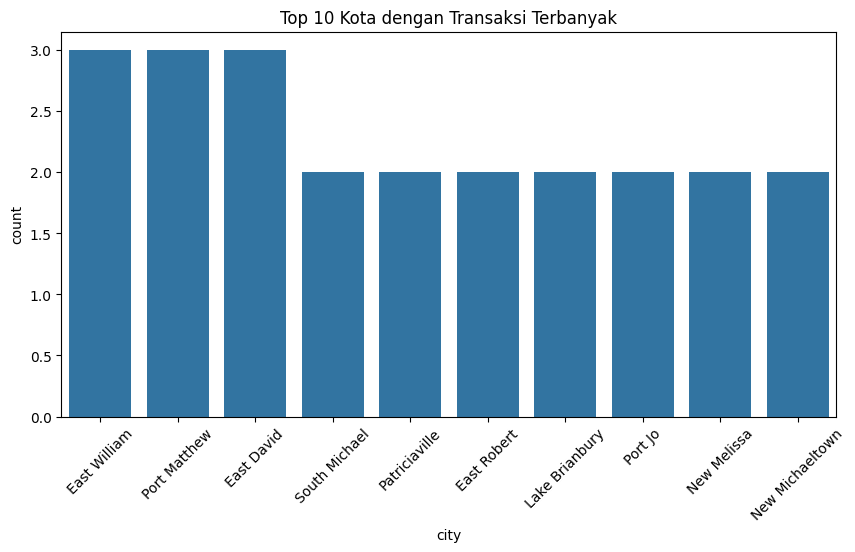

In [ ]:
# Jumlah Transaksi per Kota
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index[:10])
plt.title("Top 10 Kota dengan Transaksi Terbanyak")
plt.xticks(rotation=45)
plt.show()

3 kota dengan transaksi terbanyak adalah East William, Port Matthew, dan South Michael

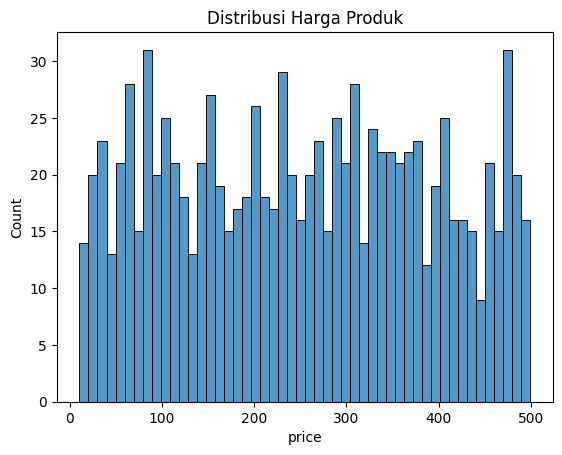

In [ ]:
# Distribusi Harga
sns.histplot(df['price'], bins=50)
plt.title("Distribusi Harga Produk")
plt.show()

/tmp/ipython-input-2377599885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_review = df.groupby('category_name')['review_score'].mean().sort_values(ascending=False)


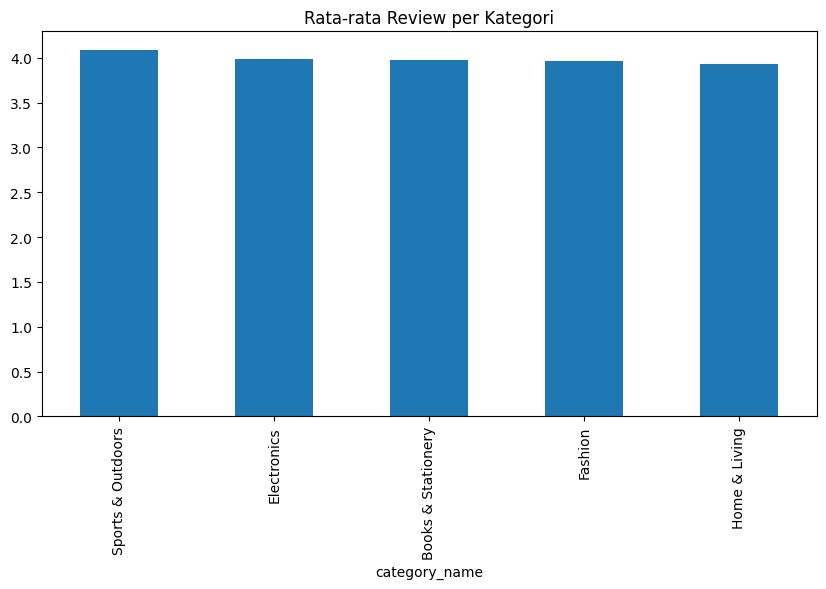

In [ ]:
# Review score rata-rata per kategori produk
avg_review = df.groupby('category_name')['review_score'].mean().sort_values(ascending=False)
avg_review.plot(kind='bar', figsize=(10,5), title='Rata-rata Review per Kategori')
plt.show()

Produk dengan review tertinggi rata-rata berasal dari kategori Sports & Outdoors

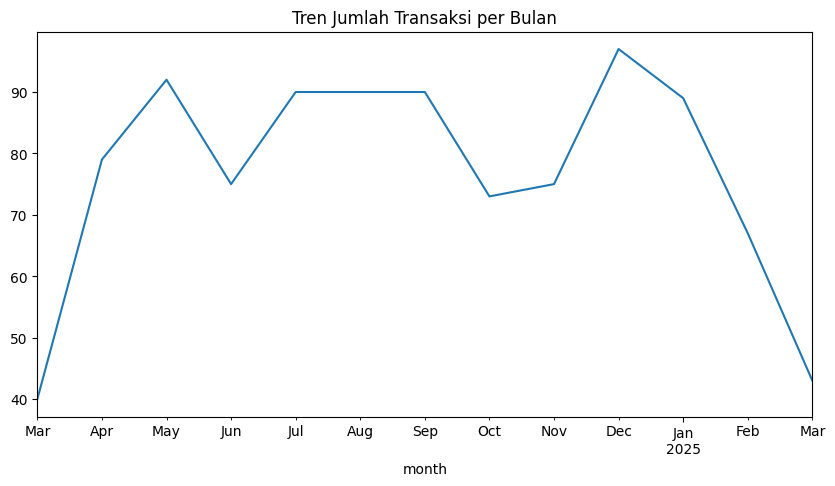

In [ ]:
# Tren transaksi per waktu
df['month'] = df['order_date'].dt.to_period('M')
df.groupby('month').size().plot(kind='line', figsize=(10,5), title='Tren Jumlah Transaksi per Bulan')
plt.show()

Dari grafik di atas terlihat bahwa jumlah transaksi mengalami fluktuasi sepanjang tahun.
Tren transaksi meningkat pada awal tahun 2024, relatif stabil di pertengahan tahun, dan mencapai puncaknya pada bulan Desember 2024.
Setelah itu, jumlah transaksi menurun tajam mulai Januari hingga Maret 2025.
Pola ini menunjukkan kemungkinan adanya peningkatan aktivitas belanja menjelang akhir tahun (mungkin karena periode liburan atau promosi akhir tahun).

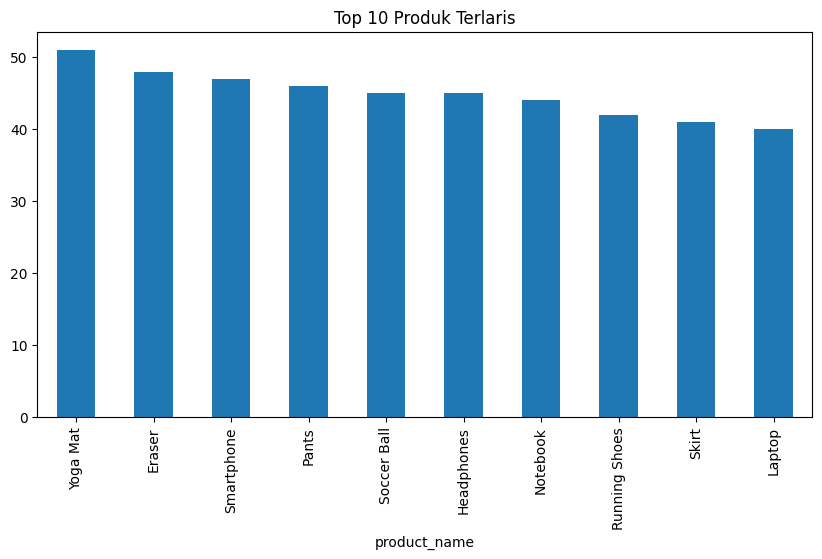

In [ ]:
# Top 10 produk paling sering dibeli
top_products = df['product_name'].value_counts().head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Produk Terlaris')
plt.show()

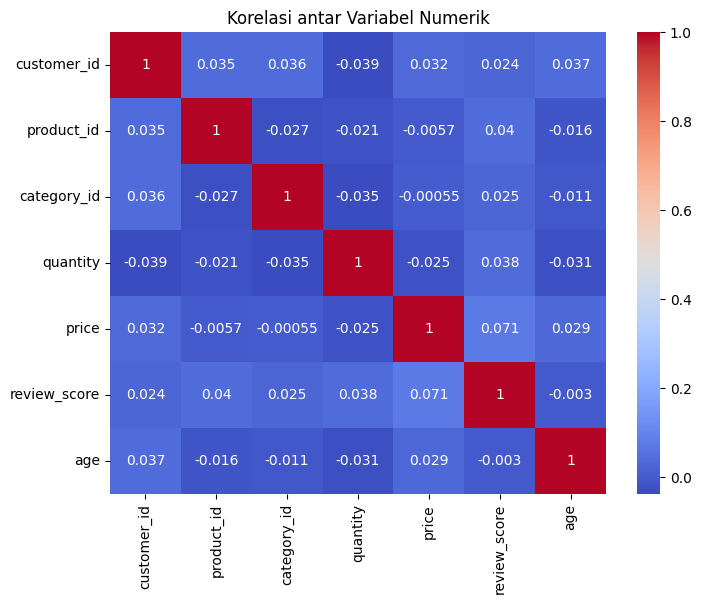

In [ ]:
# Analisis Korelasi
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Variabel Numerik")
plt.show()

# Feature Engineering

In [ ]:
# Total Nilai Transaksi
df['total_spent'] = df['quantity'] * df['price']

In [ ]:
# Informasi Waktu
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.day_name()

In [ ]:
# Menandai Transaksi yang Bernilai Tinggi
df['is_high_value'] = df['total_spent'].apply(lambda x: 1 if x > 500000 else 0)

In [ ]:
# Fitur Review Positif
df['review_positive'] = df['review_score'].apply(lambda x: 1 if x >= 4 else 0)

In [ ]:
# Kategori Umur Pelanggan
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif age < 45:
        return 'Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(categorize_age)

In [ ]:
# Jumlah Transaksi per Kota
city_counts = df['city'].value_counts()
df['city_activity'] = df['city'].map(city_counts)

In [ ]:
# Harga rata-rata per kategori produk
avg_price_by_cat = df.groupby('category_name', observed=True)['price'].transform('mean')
df['category_avg_price'] = avg_price_by_cat

In [ ]:
# Cek Hasil
df[['order_date', 'quantity', 'price', 'total_spent',
    'month', 'day_of_week', 'is_high_value',
    'review_positive', 'age_group',
    'city_activity', 'category_avg_price']].head()

,order_date,quantity,price,total_spent,month,day_of_week,is_high_value,review_positive,age_group,city_activity,category_avg_price
0,2024-12-17,2,373.36,746.72,12,Tuesday,0,0,Senior,1,259.046715
1,2024-06-01,5,299.34,1496.70,6,Saturday,0,0,Senior,3,251.024076
2,2025-02-04,5,23.00,115.00,2,Tuesday,0,1,Senior,1,251.024076
3,2024-10-28,2,230.11,460.22,10,Monday,0,1,Adult,1,261.071347
4,2024-05-10,4,176.72,706.88,5,Friday,0,0,Adult,1,244.588737


# Modelling